# MTANGFS TOOL

In [1]:
import MTAGTFS0905

## Collect

In [ ]:
APIkey = ''
MTAGTFS0905.collect(APIkey)

## Actual Arrival

In [ ]:
year, month, day = '2018', '08', '01'

In [2]:
MTAGTFS0905.arrival(year, month, day)

47 GTFS files cannot be parsed


## Delay

In [3]:
MTAGTFS0905.delay(year, month, day)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3191: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


# Analysis

In [5]:
import pandas as pd
df_delay = pd.read_csv(year + month + '/delay_' +  year + month + day + '.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## On-time/ Delay/ Earlier Rate

In [6]:
sum(df_delay.delay == 0)/len(df_delay)

0.09947720721160894

In [7]:
sum(df_delay.delay > 0)/len(df_delay)

0.7092148336346313

In [8]:
sum(df_delay.delay < 0)/len(df_delay)

0.1913079591537597

## Average delay for all trains for all stations

In [9]:
df_delay.delay.mean()

168.99347730492988

## Standard deviation of delays for all trains for all stations

In [10]:
df_delay.delay.std()

296.3124626058209

## Delays for every route

In [11]:
df_delay.groupby('route_id').mean()

,Unnamed: 0,current_status,current_stop_sequence,delay
route_id,,,,
1,323.971429,1.214286,25.500000,230.597143
2,213.804348,1.043478,31.543478,403.000000
3,304.294118,1.529412,23.058824,292.647059
4,407.795181,1.349398,15.951807,140.469880
5,390.906977,1.348837,19.976744,84.860465
5X,388.500000,1.625000,26.750000,679.750000
6,385.316832,1.000000,23.306931,250.495050
6X,195.466667,1.000000,23.666667,266.000000
7,1360.187451,1.256471,7.195294,116.770980


## Delays for every station

In [12]:
df_delay_groupbystop = df_delay.copy()
df_delay_groupbystop.stop_id = df_delay_groupbystop.stop_id.apply(lambda x: x[:-1]) # stop_id consists of 3 characters & S/N bound
df_delay_groupbystop = df_delay_groupbystop.groupby('stop_id').mean().reset_index()

stops = pd.read_csv("gtfs20180708/stops.txt")
pd.merge(df_delay_groupbystop, stops, left_on='stop_id', right_on='stop_id', how='left')[['stop_id', 'delay', 'stop_name', 'stop_lat', 'stop_lon']]

,stop_id,delay,stop_name,stop_lat,stop_lon
0,101,282.800000,Van Cortlandt Park - 242 St,40.889248,-73.898583
1,103,382.428571,238 St,40.884667,-73.900870
2,104,340.000000,231 St,40.878856,-73.904834
3,106,327.000000,Marble Hill - 225 St,40.874561,-73.909831
4,107,197.714286,215 St,40.869444,-73.915279
5,108,414.666667,207 St,40.864621,-73.918822
6,109,391.333333,Dyckman St,40.860531,-73.925536
7,110,86.500000,191 St,40.855225,-73.929412
8,111,150.000000,181 St,40.849505,-73.933596
9,112,224.333333,168 St - Washington Hts,40.840556,-73.940133


Text(0.5, 1.0, 'MTA Subway Delay Stats for B-Division trains on 2019/6/30')

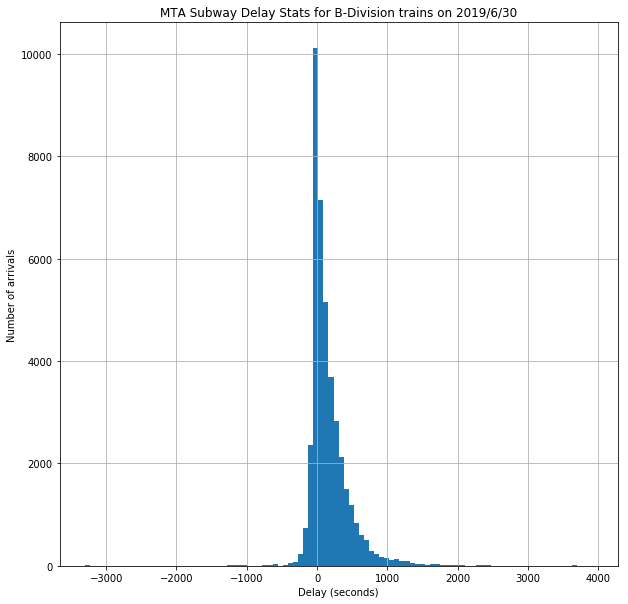

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
df_delay.delay.hist(bins=100)
plt.xlabel('Delay (seconds)')
plt.ylabel('Number of arrivals')
plt.title('MTA Subway Delay Stats for B-Division trains on 2019/6/30')

## Average route delay for a single station

In [14]:
# take Atlantic as an example
Atlantic_stop_list = list(stops[stops.stop_name.apply(lambda x: 'Atlantic' in x)]['stop_id'])
df_delay_Atlantic = df_delay[df_delay['stop_id'].isin(Atlantic_stop_list)]

In [17]:
df_delay_Atlantic.groupby('route_id').mean()[['delay']]

,delay
route_id,
2,337.000000
3,427.000000
4,29.000000
5,171.000000
B,118.238095
D,201.193548
L,-16.859155
N,320.096154
Q,180.675000
